In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('hospital_redadmission_data.csv')
label = data['readmitted']
print data.keys()
del data['readmitted']
#del data['race']
#del data['gender']
#del data['A1Cresult']
#del data['number_outpatient']
#del data['number_emergency']
#del data['change']
#del data['diabetesMed']
#del data['number_inpatient']
#del data['admission_source_id']
#print data.keys()
#print label.head()
data.head()

Index([u'race', u'gender', u'age', u'admission_type_id',
       u'discharge_disposition_id', u'admission_source_id',
       u'time_in_hospital', u'medical_specialty', u'num_lab_procedures',
       u'num_procedures', u'num_medications', u'number_outpatient',
       u'number_emergency', u'number_inpatient', u'diag_1', u'diag_2',
       u'number_diagnoses', u'A1Cresult', u'insulin', u'change',
       u'diabetesMed', u'readmitted'],
      dtype='object')


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,number_diagnoses,A1Cresult,insulin,change,diabetesMed
0,2,1,1,3,1,1,4,3,50,1,...,0,0,0,0,6,6,0,1,0,1
1,2,1,0,1,1,7,8,0,86,4,...,0,0,0,0,1,7,2,2,1,1
2,2,0,0,1,18,7,1,0,55,0,...,0,0,0,2,1,5,0,0,0,1
3,0,0,4,1,1,7,4,0,73,3,...,0,0,0,0,0,9,0,1,1,1
4,0,0,2,2,1,7,6,13,67,0,...,0,0,2,1,0,9,0,3,1,1


In [17]:
X = data.as_matrix()
y = label.as_matrix()
print X.shape
print y.shape
'''from sklearn.feature_selection import SelectKBest
selkbest = SelectKBest(k=12)
selkbest.fit(X,y)
X = selkbest.transform(X)'''
'''from sklearn.model_selection import KFold
kf = KFold(n_splits=2,shuffle=True)
kf.get_n_splits(X)

print(kf)  

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]'''
'''from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(X)
X = pca.transform(X)'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2002, random_state=42)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape
print np.unique(y_test,return_counts=True)
print np.unique(y_train,return_counts=True)

from sklearn.preprocessing import normalize
X_train = normalize(X_train,norm='l2')
X_test = normalize(X_test,norm='l2')

(117303, 21)
(117303,)
(93818, 21) (23485, 21) (93818,) (23485,)
(array([0, 1]), array([ 8379, 15106]))
(array([0, 1]), array([33095, 60723]))


In [18]:
from sklearn.metrics import accuracy_score
import time
clf = LogisticRegression(C=0.0001,class_weight='balanced',max_iter=1500,tol=0.00001)
old_ticks = time.time()
clf.fit(X_train,y_train)
new_ticks = time.time()
print new_ticks - old_ticks
old_ticks = time.time()
pred = clf.predict(X_test)
new_ticks = time.time()
print new_ticks - old_ticks
accuracy_score(pred,y_test)

0.417194128036
0.00749015808105


0.60625931445603576

In [19]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.51992588492724368

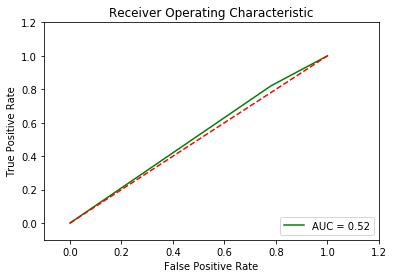

In [20]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'g',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
clf1 = tree.DecisionTreeClassifier(min_samples_leaf=5)
old_ticks = time.time()
clf1.fit(X_train,y_train)
new_ticks = time.time()
print new_ticks - old_ticks
old_ticks = time.time()
pred1 = clf1.predict(X_test)
new_ticks = time.time()
print new_ticks - old_ticks
accuracy_score(pred1,y_test)

4.4836730957
0.0112450122833


0.72769853097721948

In [30]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred1)
roc_aucs = auc(false_positive_rate, true_positive_rate)
roc_aucs

0.69099018564549863

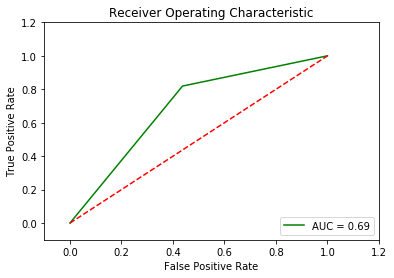

In [31]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'g',
label='AUC = %0.2f'% roc_aucs)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, pred1)
average_precision

0.76382009217354263

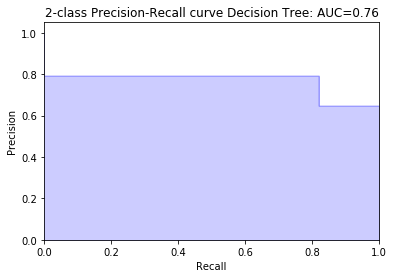

In [24]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, pred1)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve Decision Tree: AUC={0:0.2f}'.format(
          average_precision))
plt.show()

In [35]:
clf2 = RandomForestClassifier(min_samples_leaf=5,max_depth=25)
old_ticks = time.time()
clf2.fit(X_train,y_train)
new_ticks = time.time()
print new_ticks - old_ticks
old_ticks = time.time()
pred2 = clf2.predict(X_test)
new_ticks = time.time()
print new_ticks - old_ticks
accuracy_score(pred2,y_test)

5.5690112114
0.0993461608887


0.73987651692569723

In [36]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred2)
roc_aucss = auc(false_positive_rate, true_positive_rate)
roc_aucss

0.6641571380678184

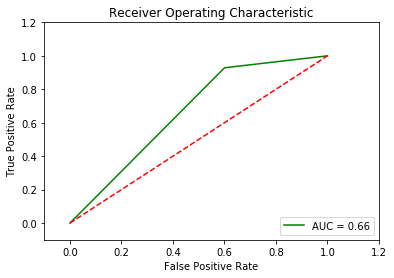

In [37]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'g',
label='AUC = %0.2f'% roc_aucss)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, pred2)
average_precision

0.75689665658183614

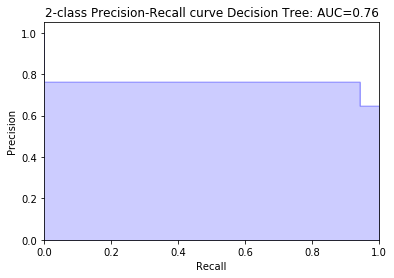

In [29]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, pred2)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve Decision Tree: AUC={0:0.2f}'.format(
          average_precision))
plt.show()

In [30]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1]), array([33159, 60659]))
(array([0, 1]), array([ 8315, 15170]))


In [38]:
y_t = []
for k in y_train:
    ys = [0,0]
    ys[k] = 1
    y_t.append(ys)

y_te = []
for k in y_test:
    ys = [0,0]
    ys[k] = 1
    y_te.append(ys)
y_t = np.array(y_t)
y_te = np.array(y_te)
print y_t.shape
print y_te.shape

(93818, 2)
(23485, 2)


In [39]:
X_train = (X_train-np.mean(X_train))/np.std(X_train)
print X_train.shape
X_train

(93818, 21)


array([[-0.40338094, -0.40338094, -0.1140091 , ..., -0.49983822,
        -0.49983822, -0.49983822],
       [-0.27704019, -0.49983822, -0.27704019, ..., -0.49983822,
        -0.3884392 , -0.3884392 ],
       [-0.49983822, -0.19690038,  0.10603747, ..., -0.49983822,
        -0.49983822, -0.49983822],
       ..., 
       [-0.27106716, -0.49983822, -0.27106716, ..., -0.49983822,
        -0.49983822, -0.38545269],
       [-0.2627674 , -0.38130281, -0.38130281, ..., -0.49983822,
        -0.49983822, -0.38130281],
       [-0.49983822, -0.40910269, -0.49983822, ..., -0.40910269,
        -0.49983822, -0.40910269]])

In [40]:
X_test = (X_test-np.mean(X_test))/np.std(X_test)
print X_test.shape
X_test

(23485, 21)


array([[-0.32093435, -0.4105948 , -0.14161345, ..., -0.4105948 ,
        -0.4105948 , -0.4105948 ],
       [-0.50025524, -0.34433693,  0.123418  , ..., -0.34433693,
        -0.50025524, -0.34433693],
       [-0.50025524, -0.50025524, -0.21730279, ..., -0.28804091,
        -0.42951713, -0.42951713],
       ..., 
       [-0.50025524, -0.50025524, -0.38836048, ..., -0.50025524,
        -0.50025524, -0.38836048],
       [-0.50025524, -0.50025524, -0.50025524, ..., -0.50025524,
        -0.50025524, -0.50025524],
       [-0.50025524, -0.50025524, -0.37271207, ..., -0.24516889,
        -0.37271207, -0.37271207]])

In [70]:
import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

n_nodes_hl1 = 10
n_nodes_hl2 = 5
'''n_nodes_hl3 = 10
n_nodes_hl4 = 10
n_nodes_hl5 = 10
n_nodes_hl6 = 10
n_nodes_hl7 = 10
n_nodes_hl8 = 10
n_nodes_hl9 = 10
n_nodes_hl10 = 10
n_nodes_hl11 = 10
n_nodes_hl12 = 10'''

n_classes = 2
batch_size = 99

x = tf.placeholder('float', [None, X_test.shape[1]])
y = tf.placeholder('float')

def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([X_test.shape[1], n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}
    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}
    '''hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}
    hidden_4_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_nodes_hl4])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl4]))}
    hidden_5_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl4, n_nodes_hl5])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl5]))}
    hidden_6_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl5, n_nodes_hl6])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl6]))}
    hidden_7_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl6, n_nodes_hl7])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl7]))}
    hidden_8_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl7, n_nodes_hl8])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl8]))}
    hidden_9_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl8, n_nodes_hl9])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl9]))}
    hidden_10_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl9, n_nodes_hl10])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl10]))}
    hidden_11_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl10, n_nodes_hl11])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl11]))}
    hidden_12_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl11, n_nodes_hl12])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl12]))}'''
    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}


    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)
    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)
    '''l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)
    l4 = tf.add(tf.matmul(l3,hidden_4_layer['weights']), hidden_4_layer['biases'])
    l4 = tf.nn.relu(l4)
    l5 = tf.add(tf.matmul(l4,hidden_5_layer['weights']), hidden_5_layer['biases'])
    l5 = tf.nn.relu(l5)
    l6 = tf.add(tf.matmul(l5,hidden_6_layer['weights']), hidden_6_layer['biases'])
    l6 = tf.nn.relu(l6)
    l7 = tf.add(tf.matmul(l6,hidden_7_layer['weights']), hidden_7_layer['biases'])
    l7 = tf.nn.relu(l7)
    l8 = tf.add(tf.matmul(l7,hidden_8_layer['weights']), hidden_8_layer['biases'])
    l8 = tf.nn.relu(l8)
    l9 = tf.add(tf.matmul(l8,hidden_9_layer['weights']), hidden_9_layer['biases'])
    l9 = tf.nn.relu(l9)
    l10 = tf.add(tf.matmul(l9,hidden_10_layer['weights']), hidden_10_layer['biases'])
    l10 = tf.nn.relu(l10)
    l11 = tf.add(tf.matmul(l10,hidden_11_layer['weights']), hidden_11_layer['biases'])
    l11 = tf.nn.relu(l11)
    l12 = tf.add(tf.matmul(l11,hidden_12_layer['weights']), hidden_12_layer['biases'])
    l12 = tf.nn.relu(l12)'''
    output = tf.matmul(l2,output_layer['weights']) + output_layer['biases']
    
    return output

def train_neural_network(x):
    prediction = neural_network_model(x)
    # OLD VERSION:
    #cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(prediction,y) )
    # NEW:
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    hm_epochs = 501
    with tf.Session() as sess:
        # OLD:
        #sess.run(tf.initialize_all_variables())
        # NEW:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            i = 0
            while i < len(X_train):
                start = i
                end = i+batch_size
                batch_x = np.array(X_train[start:end])
                batch_y = np.array(y_t[start:end])
                _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
                epoch_loss += c
                i+=batch_size
            if epoch%100==0:
                print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:X_test, y:y_te}))

train_neural_network(x)

('Epoch', 0, 'completed out of', 501, 'loss:', 22.404888153076172)
('Epoch', 100, 'completed out of', 501, 'loss:', 0.70954775810241699)
('Epoch', 200, 'completed out of', 501, 'loss:', 0.66592645645141602)
('Epoch', 300, 'completed out of', 501, 'loss:', 0.65460550785064697)
('Epoch', 400, 'completed out of', 501, 'loss:', 0.64765626192092896)
('Epoch', 500, 'completed out of', 501, 'loss:', 0.643210768699646)
('Accuracy:', 0.64892483)
(array([0, 1]), array([  652, 22833]))


In [71]:
print preds
print y_score

[1 1 1 ..., 1 1 1]
[[ 10.78768063  12.43175125]
 [ 32.57146072  33.75957108]
 [ 51.02379227  52.04125977]
 ..., 
 [ 44.67514801  45.37778091]
 [ 40.47251892  41.60573959]
 [ 50.84640121  51.44811249]]


In [72]:
y_score.shape

(23485, 2)

In [73]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_te[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_te.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
roc_auc

{0: 0.52201495894791883, 1: 0.48066522486583207, 'micro': 0.50964029377645326}

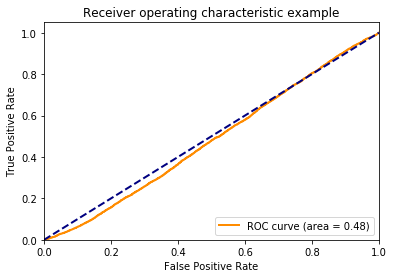

In [74]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

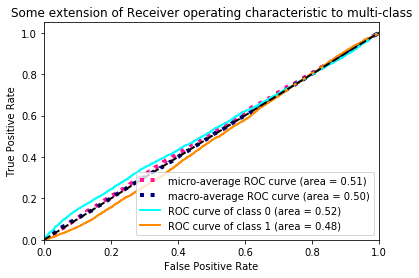

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

n_classes = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [76]:
from sklearn.metrics import roc_curve, auc
false_positive_rateml, true_positive_rateml, thresholdsml = roc_curve(y_test, preds)
roc_aucse = auc(false_positive_rateml, true_positive_rateml)
roc_aucse

0.51211645844985532

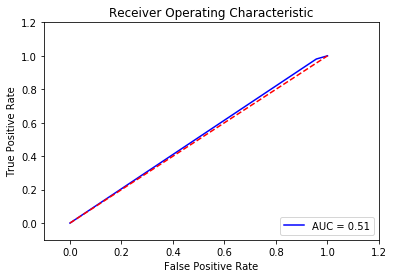

In [77]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rateml, true_positive_rateml, 'b',
label='AUC = %0.2f'% roc_aucse)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.contrib import rnn
epochs = 501
n_classes = 2
batch_size = 61
chunk_size = 7
n_chunks = 3
rnn_size = 122
#n_preds = None
x = tf.placeholder('float',[None,n_chunks,chunk_size])
y = tf.placeholder('float')
def recurrent_neural_network(x):
    layer = {'weights':tf.Variable(tf.random_normal([rnn_size,n_classes])),
             'biases':tf.Variable(tf.random_normal([n_classes]))}
    
    x = tf.unstack(x, n_chunks, 1)
    #print x.shape
    with tf.variable_scope('cell_def'):
        lstm_cell = tf.contrib.rnn.BasicLSTMCell(rnn_size)

    # Get lstm cell output
    with tf.variable_scope('rnnnnnf_def'):
        outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

    output = tf.matmul(outputs[-1],layer['weights']) + layer['biases']

    return output
def train_neural_network(x):
    prediction = recurrent_neural_network(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(epochs):
            epoch_loss = 0
            i = 0
            while i<len(X_train):
                start = i
                end = i + batch_size
                #print(start,end)
                epoch_x, epoch_y = X_train[start:end],y_t[start:end]
                epoch_x = epoch_x.reshape((batch_size,n_chunks,chunk_size))
                #print epoch_x.shape
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                epoch_loss += c
                i += batch_size
            if epoch%100==0:
                print('Epoch', epoch, 'completed out of',epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:X_test.reshape((-1, n_chunks, chunk_size)), y:y_te}))
        pred = sess.run(prediction,feed_dict={x:X_test.reshape((-1, n_chunks, chunk_size))})
        corr = tf.argmax(pred,1)
        corr = sess.run(corr)
        #print(corr)
        #n_preds = corr
        #k = [i+1 for i in range(len(corr))]
        #yg = pd.DataFrame({'ImageId':pd.Series(k),'Label':pd.Series(corr)})
        #yg.to_csv('ans.csv',index=False)
        return pred,corr
y_score_rnn,pred_rnn = train_neural_network(x)

('Epoch', 0, 'completed out of', 501, 'loss:', 989.39603453874588)
('Epoch', 100, 'completed out of', 501, 'loss:', 633.17903226613998)


In [80]:
print pred_rnn
print y_score_rnn

[1 0 1 ..., 1 1 0]
[[-36.79756546  40.45672989]
 [  9.94812107  -7.40771532]
 [-20.2035675   22.53389359]
 ..., 
 [ -2.19951558   7.86592484]
 [ -3.04996228   6.88572741]
 [ 27.8793602  -29.71606636]]


In [81]:
from sklearn.metrics import roc_curve, auc
false_positive_raternn, true_positive_raternn, thresholdsrnn = roc_curve(y_test, preds)
roc_aucsrnn = auc(false_positive_raternn, true_positive_raternn)
roc_aucsrnn

0.51211645844985532

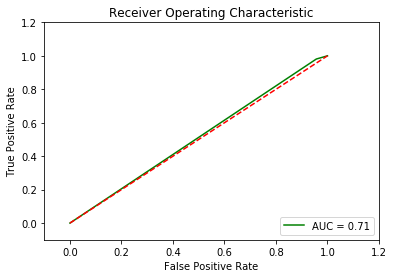

In [82]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_raternn, true_positive_raternn, 'g',
label='AUC = %0.2f'% roc_aucs)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
y_score_rnn.shape

(23485, 2)

In [84]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_te[:, i], y_score_rnn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_te.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
roc_auc

{0: 0.78398195872712972, 1: 0.78496502457020478, 'micro': 0.50964029377645326}

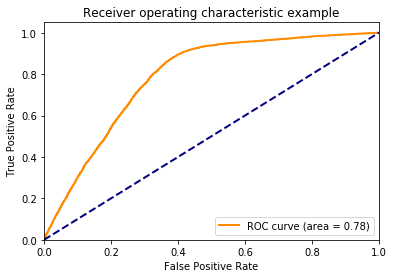

In [85]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

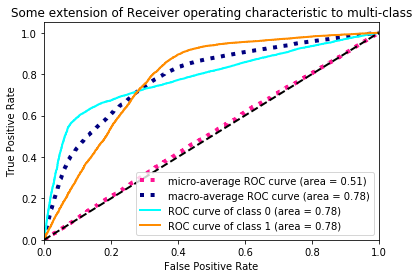

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

n_classes = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn import svm
clf3 = svm.SVC(kernel='poly',gamma=0.3,C=30,degree=2,tol=1e-6,max_iter=1000,probability=True)
old_ticks = time.time()
clf3.fit(X_train,y_train)
new_ticks = time.time()
print new_ticks - old_ticks
old_ticks = time.time()
pred3 = clf3.predict(X_test)
new_ticks = time.time()
print new_ticks - old_ticks
accuracy_score(pred3,y_test)